{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

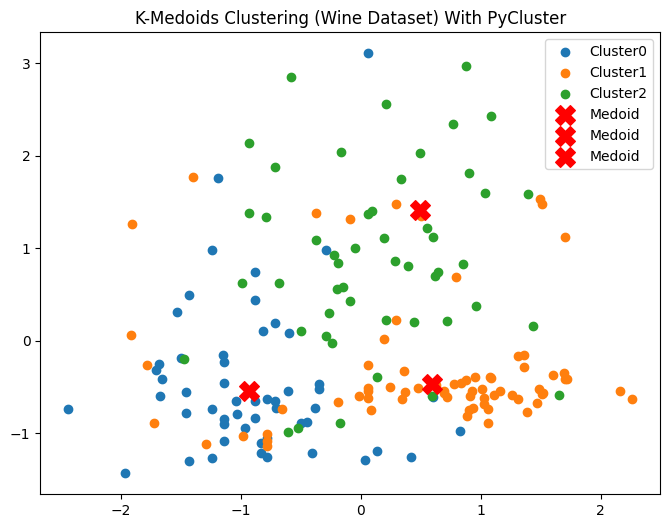

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric,type_metric
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


wine = datasets.load_wine()
print(wine)


wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)


wine_df.info()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)


import random
initial_medoids = random.sample(range(len(X_scaled)),3)


metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids_instance = kmedoids(X_scaled, initial_medoids, metric=metric)


kmedoids_instance.process()


clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()


plt.figure(figsize=(8,6))
for cluster in clusters:
    plt.scatter(X_scaled[cluster,0],X_scaled[cluster,1],label=f'Cluster{clusters.index(cluster)}')
for medoid in medoids:
    plt.scatter(X_scaled[medoid,0],X_scaled[medoid,1], marker='X', c='red', s=200,label='Medoid')
plt.title("K-Medoids Clustering (Wine Dataset) With PyCluster")
plt.legend()
plt.show()

